In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

data_frame = pd.read_csv(r"C:\Users\lenovo\Desktop\Project\data_processing_results.csv")

data_frame

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,active_days,day_of_month,week_day,device_model_S1F1,device_model_W1F0,device_model_W1F1,device_model_Z1F0,device_model_Z1F1,PCA0,PCA1
0,0,0.883224,0.000847,0.000000,0.031212,0.051546,0.591204,0.000000,0.000100,0,1,3,False,False,False,False,False,-105.520950,-12.464011
1,0,0.251374,0.000000,0.000120,0.000000,0.051546,0.585017,0.000000,0.000000,0,1,3,False,False,False,False,False,-105.520938,-12.464021
2,0,0.709821,0.000000,0.000000,0.000000,0.113402,0.344461,0.000000,0.000000,0,1,3,False,False,False,False,False,-105.521011,-12.464011
3,0,0.326427,0.000000,0.000000,0.000000,0.051546,0.595191,0.000000,0.000000,0,1,3,False,False,False,False,False,-105.520937,-12.464019
4,0,0.556935,0.000000,0.000000,0.000000,0.144330,0.454420,0.000000,0.000043,0,1,3,False,False,False,False,False,-105.520981,-12.464002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124237,0,0.074999,0.000000,0.000000,0.000000,0.092784,0.513234,0.009615,0.000000,305,2,7,False,False,False,True,False,199.464063,-15.607858
124238,0,0.706793,0.001478,0.004292,0.002401,0.103093,0.482888,0.000000,0.000186,305,2,7,False,False,False,True,False,199.464042,-15.607847
124239,0,0.077943,0.074375,0.000000,0.000000,0.103093,0.508453,0.000000,0.000000,305,2,7,False,False,False,True,False,199.464061,-15.607858
124240,0,0.929602,0.000000,0.000000,0.000000,0.113402,0.520889,0.000000,0.000000,305,2,7,False,False,False,True,False,199.464047,-15.607840


In [62]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124242 entries, 0 to 124241
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   failure            124242 non-null  int64  
 1   metric1            124242 non-null  float64
 2   metric2            124242 non-null  float64
 3   metric3            124242 non-null  float64
 4   metric4            124242 non-null  float64
 5   metric5            124242 non-null  float64
 6   metric6            124242 non-null  float64
 7   metric7            124242 non-null  float64
 8   metric9            124242 non-null  float64
 9   active_days        124242 non-null  int64  
 10  day_of_month       124242 non-null  int64  
 11  week_day           124242 non-null  int64  
 12  device_model_S1F1  124242 non-null  bool   
 13  device_model_W1F0  124242 non-null  bool   
 14  device_model_W1F1  124242 non-null  bool   
 15  device_model_Z1F0  124242 non-null  bool   
 16  de

In [63]:
data_frame["failure"].value_counts(normalize = True)

failure
0    0.999147
1    0.000853
Name: proportion, dtype: float64

Text(0.5, 1.0, "Distribution of 'failure'")

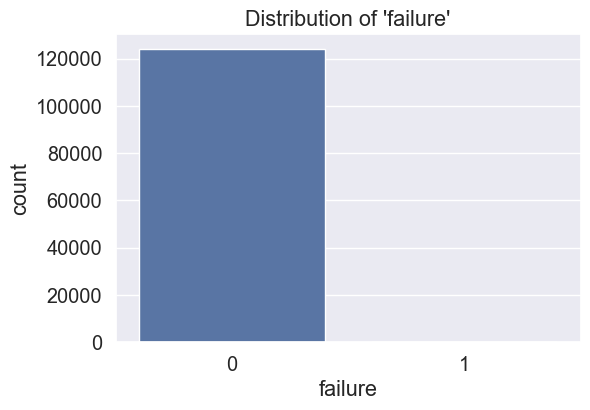

In [64]:
plt.figure(figsize=(6, 4))
sns.countplot(data = data_frame, x = "failure")
plt.title("Distribution of 'failure'")

In [65]:
#We have imbalanced data with a 99:1 ratio. The model could randomly guess and still achieve 99% accuracy, but 0% precision. 
#To address this, I am resampling it with a 75:25 ratio.

x = data_frame.copy()

y = data_frame["failure"]

x.drop("failure", axis = 1, inplace = True)

In [66]:
sampling_strategy = {0: int(3 * len(y[y == 1])), 1: len(y[y == 1])}

rus = RandomUnderSampler(sampling_strategy = sampling_strategy, random_state = 42)

x_resampled, y_resampled = rus.fit_resample(x, y)

under_sample = x_resampled.copy()
under_sample["failure"] = y_resampled

under_sample

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,active_days,day_of_month,week_day,device_model_S1F1,device_model_W1F0,device_model_W1F1,device_model_Z1F0,device_model_Z1F1,PCA0,PCA1,failure
57915,0.305791,0.000000,0.00000,0.000000,0.072165,0.276969,0.000000,0.000029,79,21,5,False,False,False,False,False,-26.258498,6.454590,0
104779,0.965973,0.000000,0.00004,0.000000,0.144330,0.494305,0.000000,0.000000,201,21,1,False,False,False,False,False,95.731141,4.831173,0
116733,0.373957,0.000739,0.00000,0.000000,0.103093,0.002975,0.000000,0.000000,242,31,7,False,False,True,False,False,136.861355,14.239983,0
49502,0.166041,0.000000,0.00000,0.000000,0.072165,0.328599,0.000000,0.000014,66,8,6,False,False,True,False,False,-39.432919,-6.374257,0
108626,0.453294,0.000000,0.00000,0.000000,0.061856,0.496057,0.000000,0.000014,212,1,5,False,True,False,False,False,106.458993,-15.339783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74715,0.499305,0.000000,0.00000,0.010804,0.659794,0.357992,0.000000,0.000000,116,27,7,False,False,False,False,False,10.818782,11.942163,1
109675,0.065713,0.001355,0.00000,0.000000,0.082474,0.000032,0.000000,0.000000,215,4,1,False,False,True,False,False,109.500296,-12.355865,1
109119,0.451379,0.003694,0.00000,0.000000,0.072165,0.427835,0.000000,0.000000,214,3,7,False,False,False,False,False,108.485735,-13.378962,1
27709,0.756842,0.000000,0.00000,0.000000,0.061856,0.464656,0.028846,0.000000,34,4,2,False,False,False,True,False,-71.483265,-9.917377,1


Text(0.5, 1.0, "Distribution of 'failure'")

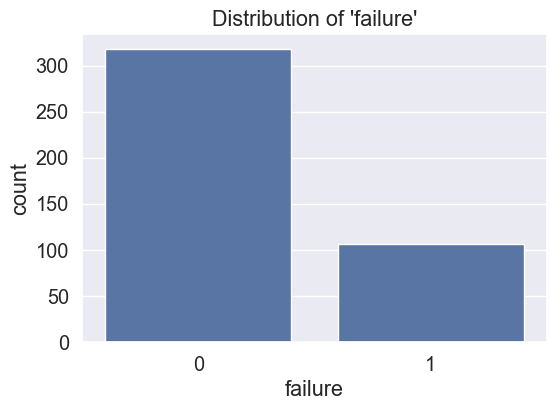

In [67]:
plt.figure(figsize=(6, 4))
sns.countplot(data = under_sample, x = "failure")
plt.title("Distribution of 'failure'")

In [68]:
#I will be running multiple unsupervised anomaly detection algorithms. I intentionally left the parameters blank to avoid interfering with the results.

#Isolation Forest
iso_forest = IsolationForest()
under_sample["anomaly_iso_forest"] = iso_forest.fit_predict(under_sample.drop(columns=["failure"]))

#Local Outlier Factor
clf = LocalOutlierFactor()
under_sample["anomaly_LOF"] = clf.fit_predict(under_sample.drop(columns=["failure"]))

#One Class SVM
sgd_oneclass_svm = OneClassSVM()
under_sample["anomaly_sgd_oneclass_svm"] = sgd_oneclass_svm.fit_predict(under_sample.drop(columns=["failure"]))

#Elliptic Envelope
elliptic_envelope = EllipticEnvelope()
under_sample["anomaly_elliptic_envelope"] = elliptic_envelope.fit_predict(under_sample.drop(columns=["failure"]))

#DBSCAN
dbscan = DBSCAN()
under_sample["anomaly_dbscan"] = dbscan.fit_predict(under_sample.drop(columns=["failure"]))

under_sample["anomaly_iso_forest"] = under_sample["anomaly_iso_forest"].map({1: 0, -1: 1})
under_sample["anomaly_LOF"] = under_sample["anomaly_LOF"].map({1: 0, -1: 1})
under_sample["anomaly_sgd_oneclass_svm"] = under_sample["anomaly_sgd_oneclass_svm"].map({1: 0, -1: 1})
under_sample["anomaly_elliptic_envelope"] = under_sample["anomaly_elliptic_envelope"].map({1: 0, -1: 1})
under_sample["anomaly_dbscan"] = under_sample["anomaly_dbscan"].map({-1: 1, 0: 0})

frequency_iso_forest = under_sample["anomaly_iso_forest"].value_counts().to_dict()
print("anomaly_iso_forest", frequency_iso_forest)

frequency_LOF = under_sample["anomaly_LOF"].value_counts().to_dict()
print("anomaly_LOF", frequency_LOF)

frequency_sgd_oneclass_svm = under_sample["anomaly_sgd_oneclass_svm"].value_counts().to_dict()
print("anomaly_sgd_oneclass_svm", frequency_sgd_oneclass_svm)

frequency_elliptic_envelope = under_sample["anomaly_elliptic_envelope"].value_counts().to_dict()
print("anomaly_elliptic_envelope", frequency_elliptic_envelope)

frequency_dbscan = under_sample["anomaly_dbscan"].value_counts().to_dict()
print("anomaly_dbscan", frequency_dbscan)

under_sample

anomaly_iso_forest {0: 395, 1: 29}
anomaly_LOF {0: 421, 1: 3}
anomaly_sgd_oneclass_svm {0: 215, 1: 209}
anomaly_elliptic_envelope {0: 381, 1: 43}
anomaly_dbscan {1: 424}


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\covariance\_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,active_days,day_of_month,...,device_model_Z1F0,device_model_Z1F1,PCA0,PCA1,failure,anomaly_iso_forest,anomaly_LOF,anomaly_sgd_oneclass_svm,anomaly_elliptic_envelope,anomaly_dbscan
57915,0.305791,0.000000,0.00000,0.000000,0.072165,0.276969,0.000000,0.000029,79,21,...,False,False,-26.258498,6.454590,0,0,0,0,0,1
104779,0.965973,0.000000,0.00004,0.000000,0.144330,0.494305,0.000000,0.000000,201,21,...,False,False,95.731141,4.831173,0,0,0,1,0,1
116733,0.373957,0.000739,0.00000,0.000000,0.103093,0.002975,0.000000,0.000000,242,31,...,False,False,136.861355,14.239983,0,0,0,1,0,1
49502,0.166041,0.000000,0.00000,0.000000,0.072165,0.328599,0.000000,0.000014,66,8,...,False,False,-39.432919,-6.374257,0,0,0,0,0,1
108626,0.453294,0.000000,0.00000,0.000000,0.061856,0.496057,0.000000,0.000014,212,1,...,False,False,106.458993,-15.339783,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74715,0.499305,0.000000,0.00000,0.010804,0.659794,0.357992,0.000000,0.000000,116,27,...,False,False,10.818782,11.942163,1,0,0,1,0,1
109675,0.065713,0.001355,0.00000,0.000000,0.082474,0.000032,0.000000,0.000000,215,4,...,False,False,109.500296,-12.355865,1,0,0,1,0,1
109119,0.451379,0.003694,0.00000,0.000000,0.072165,0.427835,0.000000,0.000000,214,3,...,False,False,108.485735,-13.378962,1,0,0,1,0,1
27709,0.756842,0.000000,0.00000,0.000000,0.061856,0.464656,0.028846,0.000000,34,4,...,True,False,-71.483265,-9.917377,1,0,0,0,0,1


In [69]:
from sklearn.metrics import accuracy_score

accuracy_iso_forest = accuracy_score(under_sample["failure"], under_sample["anomaly_iso_forest"])
accuracy_LOF = accuracy_score(under_sample["failure"], under_sample["anomaly_LOF"])
accuracy_sgd_oneclass_svm = accuracy_score(under_sample["failure"], under_sample["anomaly_sgd_oneclass_svm"])
accuracy_elliptic_envelope = accuracy_score(under_sample["failure"], under_sample["anomaly_elliptic_envelope"])
accuracy_dbscan = accuracy_score(under_sample["failure"], under_sample["anomaly_dbscan"])

print("Accuracy of Isolation Forest:", accuracy_iso_forest)
print("Accuracy of Local Outlier Factor:", accuracy_LOF)
print("Accuracy of SGD One-Class SVM:", accuracy_sgd_oneclass_svm)
print("Accuracy of Elliptic Envelope:", accuracy_elliptic_envelope)
print("Accuracy of DBSCAN:", accuracy_dbscan)

Accuracy of Isolation Forest: 0.7617924528301887
Accuracy of Local Outlier Factor: 0.7523584905660378
Accuracy of SGD One-Class SVM: 0.5117924528301887
Accuracy of Elliptic Envelope: 0.7995283018867925
Accuracy of DBSCAN: 0.25


In [70]:
precision_iso_forest = precision_score(under_sample["failure"], under_sample["anomaly_iso_forest"])
precision_LOF = precision_score(under_sample["failure"], under_sample["anomaly_LOF"])
precision_sgd_oneclass_svm = precision_score(under_sample["failure"], under_sample["anomaly_sgd_oneclass_svm"])
precision_elliptic_envelope = precision_score(under_sample["failure"], under_sample["anomaly_elliptic_envelope"])
precision_dbscan = precision_score(under_sample["failure"], under_sample["anomaly_dbscan"])

print("Precision of Isolation Forest:", precision_iso_forest)
print("Precision of Local Outlier Factor:", precision_LOF)
print("Precision of SGD One-Class SVM:", precision_sgd_oneclass_svm)
print("Precision of Elliptic Envelope:", precision_elliptic_envelope)
print("Precision of DBSCAN:", precision_dbscan)

Precision of Isolation Forest: 0.5862068965517241
Precision of Local Outlier Factor: 0.6666666666666666
Precision of SGD One-Class SVM: 0.2583732057416268
Precision of Elliptic Envelope: 0.7441860465116279
Precision of DBSCAN: 0.25


In [71]:
f1_iso_forest = f1_score(under_sample["failure"], under_sample["anomaly_iso_forest"])
f1_LOF = f1_score(under_sample["failure"], under_sample["anomaly_LOF"])
f1_sgd_oneclass_svm = f1_score(under_sample["failure"], under_sample["anomaly_sgd_oneclass_svm"])
f1_elliptic_envelope = f1_score(under_sample["failure"], under_sample["anomaly_elliptic_envelope"])
f1_dbscan = f1_score(under_sample["failure"], under_sample["anomaly_dbscan"])

print("F1 Score of Isolation Forest:", f1_iso_forest)
print("F1 Score of Local Outlier Factor:", f1_LOF)
print("F1 Score of SGD One-Class SVM:", f1_sgd_oneclass_svm)
print("F1 Score of Elliptic Envelope:", f1_elliptic_envelope)
print("F1 Score of DBSCAN:", f1_dbscan)

F1 Score of Isolation Forest: 0.2518518518518518
F1 Score of Local Outlier Factor: 0.03669724770642202
F1 Score of SGD One-Class SVM: 0.34285714285714286
F1 Score of Elliptic Envelope: 0.42953020134228187
F1 Score of DBSCAN: 0.4


In [72]:
auc_iso_forest = roc_auc_score(under_sample["failure"], under_sample["anomaly_iso_forest"])
auc_LOF = roc_auc_score(under_sample["failure"], under_sample["anomaly_LOF"])
auc_sgd_oneclass_svm = roc_auc_score(under_sample["failure"], under_sample["anomaly_sgd_oneclass_svm"])
auc_elliptic_envelope = roc_auc_score(under_sample["failure"], under_sample["anomaly_elliptic_envelope"])
auc_dbscan = roc_auc_score(under_sample["failure"], under_sample["anomaly_dbscan"])

print("AUC of Isolation Forest:", auc_iso_forest)
print("AUC of Local Outlier Factor:", auc_LOF)
print("AUC of SGD One-Class SVM:", auc_sgd_oneclass_svm)
print("AUC of Elliptic Envelope:", auc_elliptic_envelope)
print("AUC of DBSCAN:", auc_dbscan)

AUC of Isolation Forest: 0.5613207547169812
AUC of Local Outlier Factor: 0.5078616352201258
AUC of SGD One-Class SVM: 0.5110062893081762
AUC of Elliptic Envelope: 0.6336477987421384
AUC of DBSCAN: 0.5


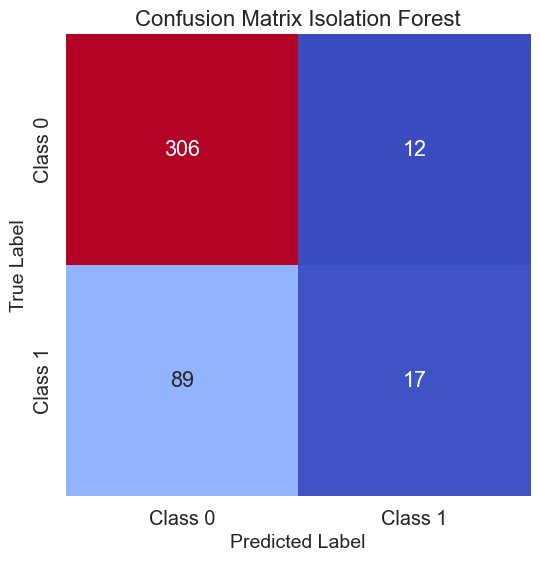


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       318
           1       0.59      0.16      0.25       106

    accuracy                           0.76       424
   macro avg       0.68      0.56      0.56       424
weighted avg       0.73      0.76      0.71       424



In [74]:
y_test = under_sample["failure"]
y_pred_test = under_sample["anomaly_iso_forest"]

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize = (6, 6))
sns.set(font_scale = 1.3)
sns.heatmap(cm, annot = True, fmt = "d", cmap = "coolwarm", cbar=False,
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])

plt.xlabel("Predicted Label", fontsize = 14)
plt.ylabel("True Label", fontsize = 14)
plt.title("Confusion Matrix Isolation Forest", fontsize = 16)
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

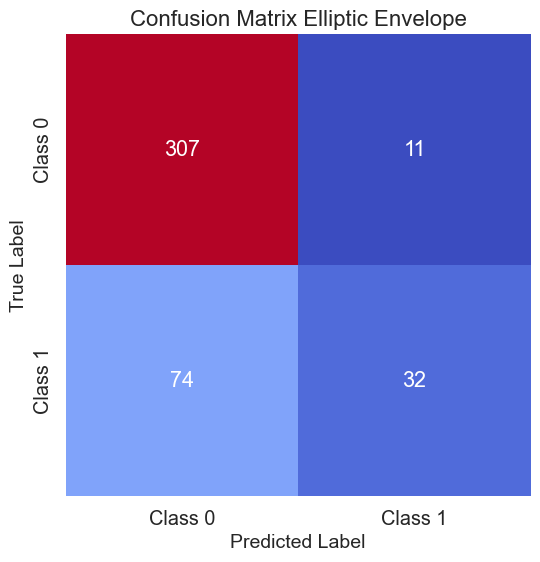


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       318
           1       0.74      0.30      0.43       106

    accuracy                           0.80       424
   macro avg       0.77      0.63      0.65       424
weighted avg       0.79      0.80      0.77       424



In [76]:
y_test = under_sample["failure"]
y_pred_test = under_sample["anomaly_elliptic_envelope"]

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize = (6, 6))
sns.set(font_scale = 1.3)
sns.heatmap(cm, annot = True, fmt = "d", cmap = "coolwarm", cbar=False,
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])

plt.xlabel("Predicted Label", fontsize = 14)
plt.ylabel("True Label", fontsize = 14)
plt.title("Confusion Matrix Elliptic Envelope", fontsize = 16)
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))